In [20]:
import pandas as pd
import numpy as np

In [21]:
df_feargreed = pd.read_csv('./csv_files/fear_greed_index.csv')
df_hist = pd.read_csv('./csv_files/historical_data.csv')


In [22]:
df_feargreed

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [23]:
df_hist.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [24]:
df_hist['Timestamp IST'] = pd.to_datetime(df_hist['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')
df_hist['date'] = df_hist['Timestamp IST'].dt.date
df_hist['date'] = pd.to_datetime(df_hist['date'])
df_hist

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13974,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,957.10,139554.75,BUY,2025-05-01 00:33:00,39470.380000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,32.097592,1.100000e+15,1.750000e+12,2025-05-01
13975,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,274.50,40024.85,BUY,2025-05-01 00:33:00,40427.480000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,9.205714,2.740000e+14,1.750000e+12,2025-05-01
13976,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,91.66,13364.94,BUY,2025-05-01 00:33:00,40701.980000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,3.073937,6.800000e+14,1.750000e+12,2025-05-01
13977,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8200,13.71,1999.19,BUY,2025-05-01 00:33:00,40793.640000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,0.459814,2.500000e+14,1.750000e+12,2025-05-01


In [25]:
df_hist['trade_value'] = df_hist['Size USD']
df_hist['is_win'] = df_hist['Closed PnL'] > 0
df_hist['Closed PnL'] = df_hist['Closed PnL'].astype(float)
df_hist

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,trade_value,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13974,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,957.10,139554.75,BUY,2025-05-01 00:33:00,39470.380000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,32.097592,1.100000e+15,1.750000e+12,2025-05-01,139554.75,False
13975,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,274.50,40024.85,BUY,2025-05-01 00:33:00,40427.480000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,9.205714,2.740000e+14,1.750000e+12,2025-05-01,40024.85,False
13976,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,91.66,13364.94,BUY,2025-05-01 00:33:00,40701.980000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,3.073937,6.800000e+14,1.750000e+12,2025-05-01,13364.94,False
13977,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8200,13.71,1999.19,BUY,2025-05-01 00:33:00,40793.640000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,0.459814,2.500000e+14,1.750000e+12,2025-05-01,1999.19,False


In [26]:
daily = df_hist.groupby('date').agg({
    'trade_value': 'sum',             # total traded volume
    'Size Tokens': 'sum',             # total tokens
    'Closed PnL': 'sum',              # total profit/loss
    'is_win': 'mean',                 # win rate
    'Account': 'nunique',             # unique traders
}).reset_index()
df_hist

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,trade_value,is_win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13974,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,957.10,139554.75,BUY,2025-05-01 00:33:00,39470.380000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,32.097592,1.100000e+15,1.750000e+12,2025-05-01,139554.75,False
13975,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,274.50,40024.85,BUY,2025-05-01 00:33:00,40427.480000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,9.205714,2.740000e+14,1.750000e+12,2025-05-01,40024.85,False
13976,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8100,91.66,13364.94,BUY,2025-05-01 00:33:00,40701.980000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,3.073937,6.800000e+14,1.750000e+12,2025-05-01,13364.94,False
13977,0x513b8629fe877bb581bf244e326a047b249c4ff1,SOL,145.8200,13.71,1999.19,BUY,2025-05-01 00:33:00,40793.640000,Open Long,0.0,0xcbb25369d6e8e8533f4604228e9bc001e7008cf50e80...,9.005577e+10,True,0.459814,2.500000e+14,1.750000e+12,2025-05-01,1999.19,False


In [27]:
daily.rename(columns={
    'trade_value': 'total_volume_usd',
    'Size Tokens': 'total_tokens',
    'Closed PnL': 'total_pnl',
    'is_win': 'win_rate',
    'Account': 'unique_traders'
}, inplace=True)


In [28]:
daily.head()

,date,total_volume_usd,total_tokens,total_pnl,win_rate,unique_traders
0,2024-09-20,28301.77,7495.53,0.0,0.0,1
1,2024-09-24,6113.57,1573.23,0.0,0.0,1
2,2024-09-25,2753.02,669.51,0.0,0.0,1
3,2024-09-26,33271.51,8341.53,0.0,0.0,1
4,2024-09-27,26104.72,6412.48,0.0,0.0,1


In [29]:
df_feargreed['date'] = pd.to_datetime(df_feargreed['date'])
df_feargreed.rename(columns={'value': 'fg_value'}, inplace=True)
df_feargreed = df_feargreed[['date', 'fg_value', 'classification']]

In [30]:
merged = pd.merge(daily, df_feargreed, on='date', how='inner')
merged.head()


,date,total_volume_usd,total_tokens,total_pnl,win_rate,unique_traders,fg_value,classification
0,2024-09-20,28301.77,7495.53,0.0,0.0,1,54,Neutral
1,2024-09-24,6113.57,1573.23,0.0,0.0,1,54,Neutral
2,2024-09-25,2753.02,669.51,0.0,0.0,1,59,Greed
3,2024-09-26,33271.51,8341.53,0.0,0.0,1,50,Neutral
4,2024-09-27,26104.72,6412.48,0.0,0.0,1,61,Greed


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

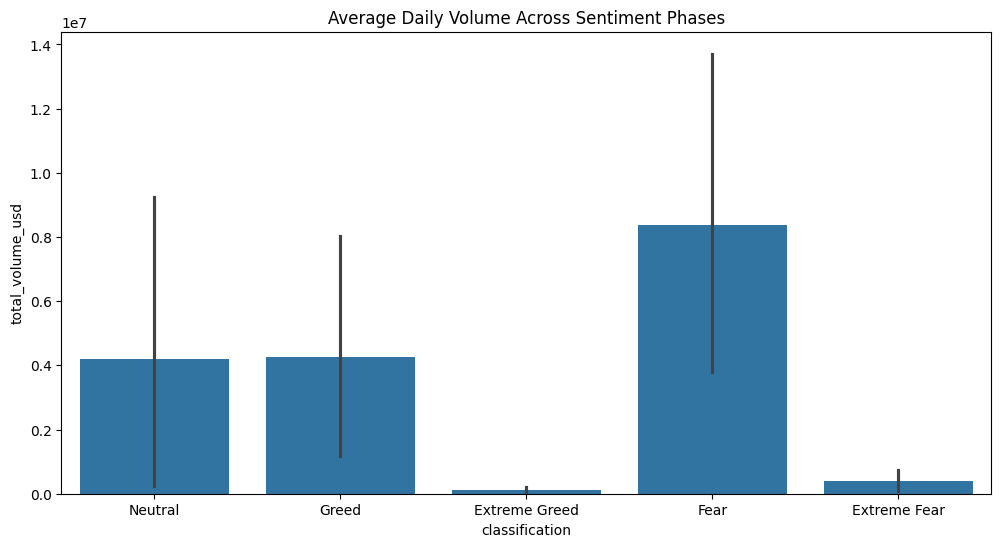

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged, x='classification', y='total_volume_usd', estimator='mean')
plt.title("Average Daily Volume Across Sentiment Phases")
plt.savefig("outputs/volume_vs_sentiment.png", dpi=300)
plt.show()

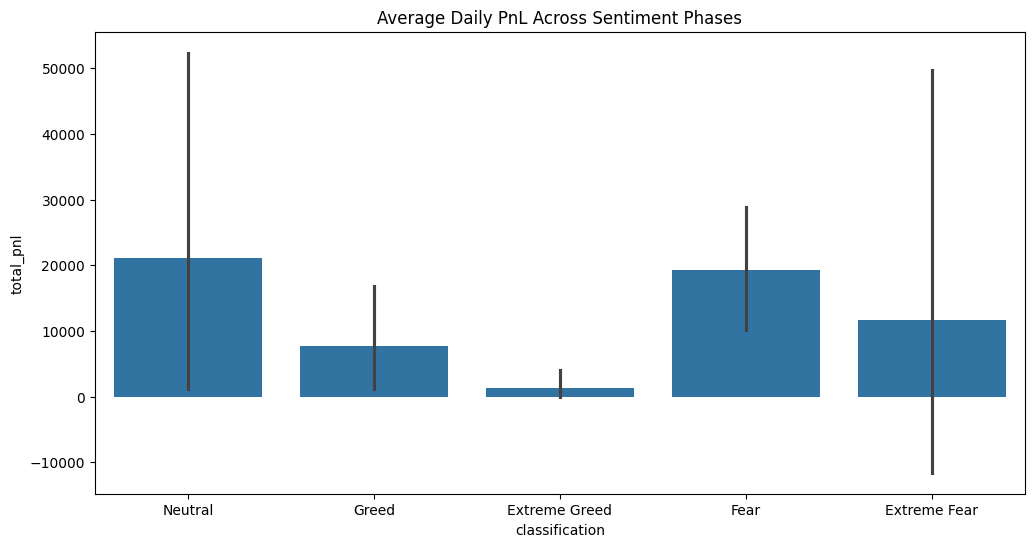

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged, x='classification', y='total_pnl', estimator='mean')
plt.title("Average Daily PnL Across Sentiment Phases")
plt.savefig("outputs/pnl_vs_sentiment.png", dpi=300)
plt.show()

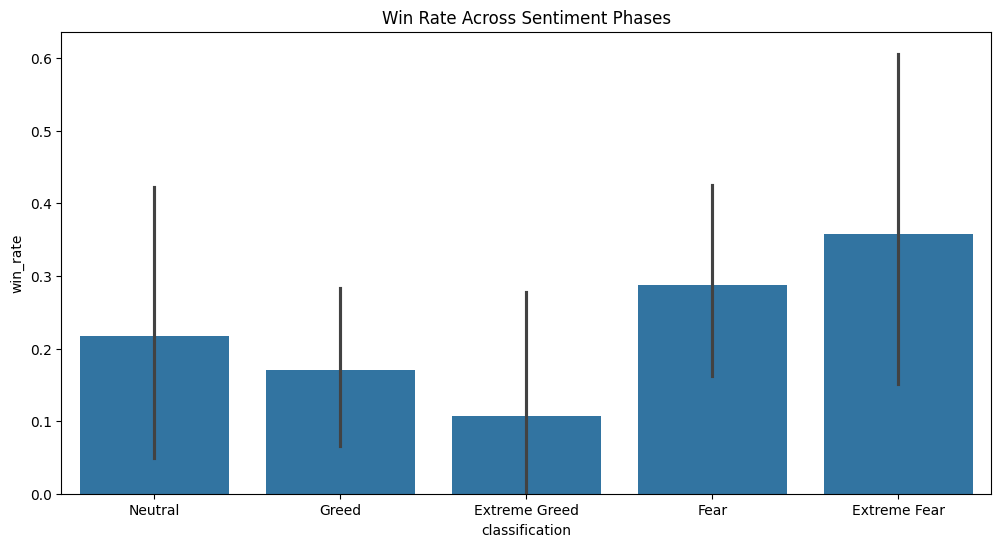

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged, x='classification', y='win_rate')
plt.title("Win Rate Across Sentiment Phases")
plt.savefig("outputs/winrate_vs_sentiment.png", dpi=300)
plt.show()

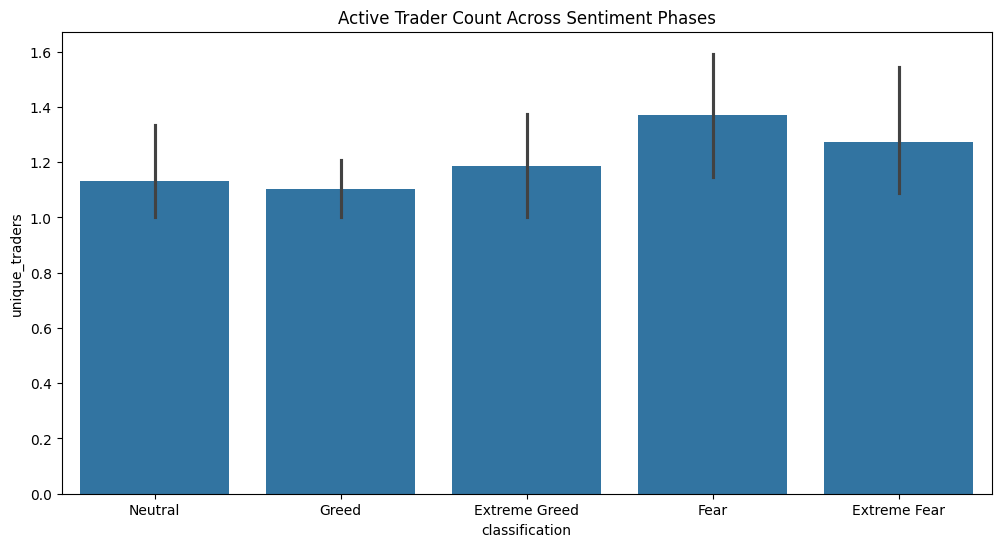

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged, x='classification', y='unique_traders')
plt.title("Active Trader Count Across Sentiment Phases")
plt.savefig("outputs/unique_traders_vs_sentiment.png", dpi=300)
plt.show()